#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [17]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/Users/zahuralazzam/Desktop/ShAI/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [18]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

<h1>Basic Data Exploration</h1>

In [19]:
print ("The shape of the data is (row, column):"+ str(df.shape))


The shape of the data is (row, column):(148654, 13)


In [20]:
print (df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


In [21]:
print("Is there any duplicate in train dataset? ",df.duplicated())

Is there any duplicate in train dataset?  0         False
1         False
2         False
3         False
4         False
          ...  
148649    False
148650    False
148651    False
148652    False
148653    False
Length: 148654, dtype: bool


In [22]:
null_count = df.isnull().sum()

print("Null values count in each column of dataset:")
print(null_count)

Null values count in each column of dataset:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


<h1>Descriptive Statistics</h1>

In [64]:
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df['TotalPay'].std()

print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Salary Range:", salary_range)
print("Standard Deviation of Salary:", std_dev_salary)


Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range: 568213.56
Standard Deviation of Salary: 50517.005273949944


In [65]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

<h1>Data Cleaning</h1>

In [25]:
df['BasePay'].describe()

count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

In [26]:
df['OvertimePay'].describe()

count    148650.000000
mean       5066.059886
std       11454.380559
min          -0.010000
25%           0.000000
50%           0.000000
75%        4658.175000
max      245131.880000
Name: OvertimePay, dtype: float64

In [27]:
df['OtherPay'].describe()

count    148650.000000
mean       3648.767297
std        8056.601866
min       -7058.590000
25%           0.000000
50%         811.270000
75%        4236.065000
max      400184.250000
Name: OtherPay, dtype: float64

In [28]:
df['Benefits'].describe()

count    112491.000000
mean      25007.893151
std       15402.215858
min         -33.890000
25%       11535.395000
50%       28628.620000
75%       35566.855000
max       96570.660000
Name: Benefits, dtype: float64

In [29]:
#The median is more robust to outliers, as it represents the middle value when the data is sorted.
df['BasePay'].fillna(df['BasePay'].median(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].median(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].median(), inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

#'Notes' and 'Status' columns, dropping since they have no non-null values.
df.drop(['Notes', 'Status'], axis=1, inplace=True)


<h1>Basic Data Visualization</h1>

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


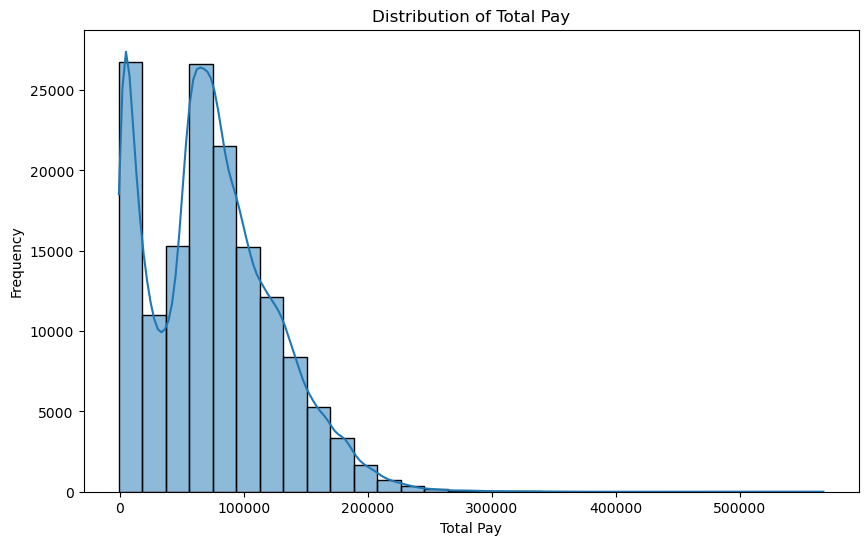

In [35]:
# Histogram of TotalPayBenefits
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True)
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()


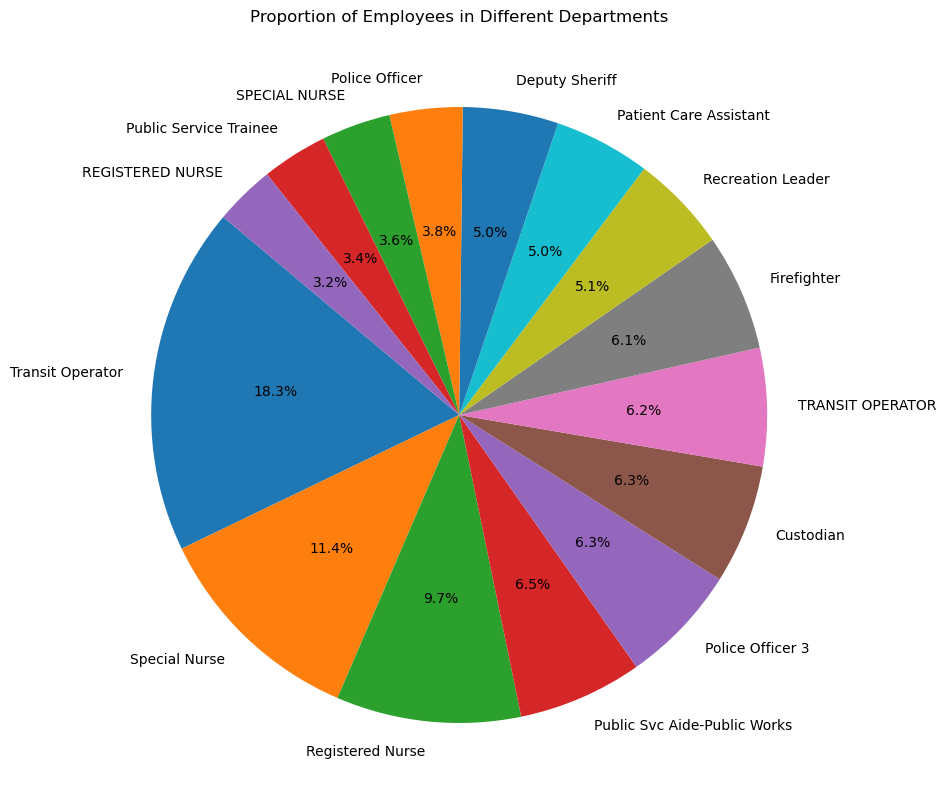

In [40]:
# Pie Chart for Proportion of Employees in Different Departments
department_counts = df['JobTitle'].value_counts().head(15)  #Top 15

plt.figure(figsize=(10, 10))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.show()

<h1>Grouped Analysis</h1>

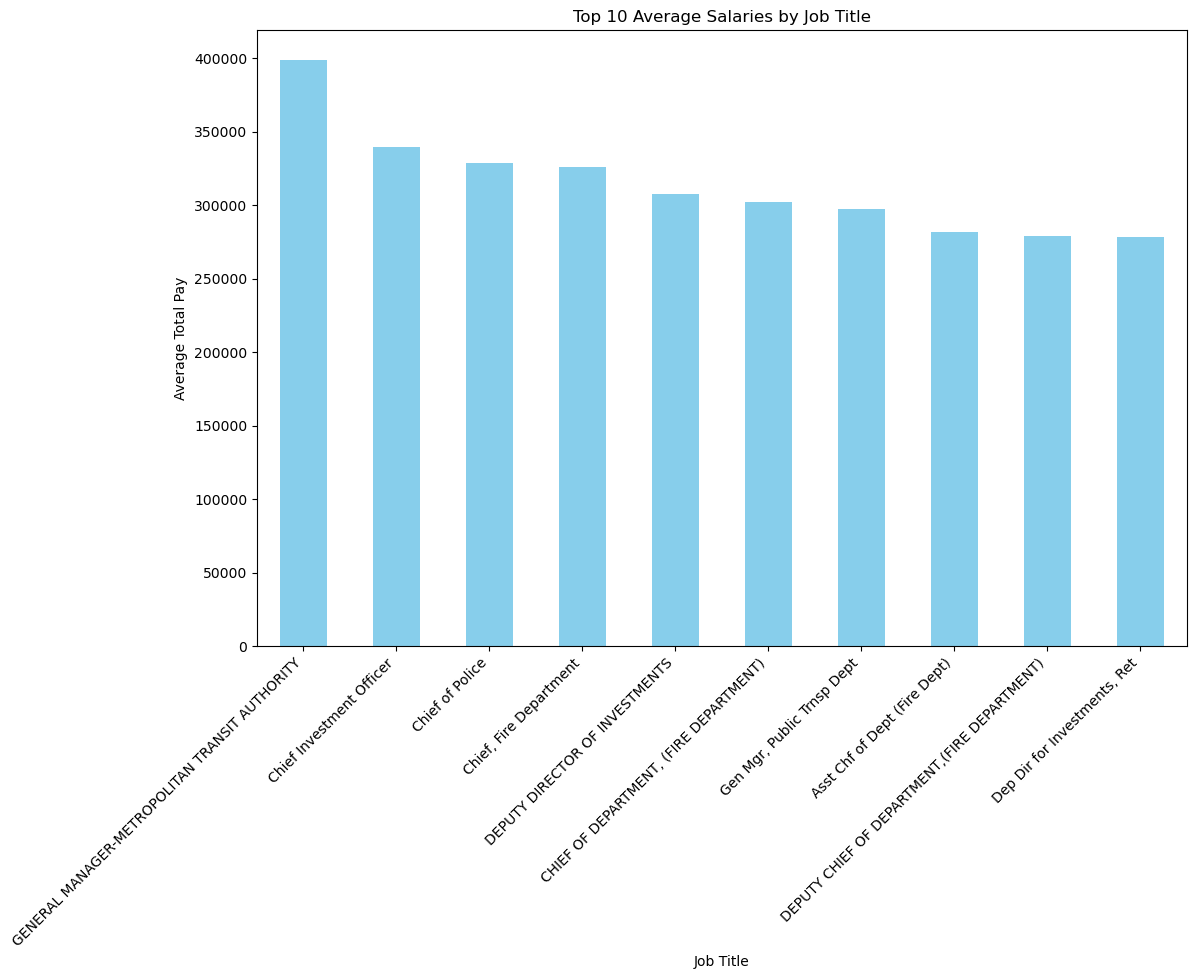

In [67]:
# Group the data by department and calculate average salary for each department
average_salary_by_department = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

# Plot the grouped analysis
plt.figure(figsize=(12, 8))
average_salary_by_department.plot(kind='bar', color='skyblue')
plt.title('Top 10 Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Total Pay')
plt.xticks(rotation=45, ha='right')
plt.show()


In [48]:
# Grouping data by 'Year' and 'JobTitle', calculating mean salary for each group
grouped_data = df.groupby(['Year', 'JobTitle'])['TotalPayBenefits'].mean().reset_index()

print(grouped_data.head(10))



   Year                            JobTitle  TotalPayBenefits
0  2011                       ACCOUNT CLERK      44035.664337
1  2011                          ACCOUNTANT      47429.268000
2  2011                   ACCOUNTANT INTERN      29031.742917
3  2011                       ACUPUNCTURIST      67594.400000
4  2011              ADMINISTRATIVE ANALYST      63954.867527
5  2011           ADMINISTRATIVE ANALYST II      61497.035000
6  2011          ADMINISTRATIVE ANALYST III      92698.515000
7  2011             ADMINISTRATIVE ENGINEER     127961.430000
8  2011     ADMINISTRATIVE SERVICES MANAGER      77015.580000
9  2011  ADMINISTRATOR, SFGH MEDICAL CENTER     257124.440000


<h1>Simple Correlation Analysis</h1>

In [52]:
correlation = df['TotalPay'].corr(df['BasePay'])

print(f"Correlation between TotalPay and BasePay: {correlation}")

Correlation between TotalPay and BasePay: 0.9506887197970234


In [53]:
correlation = df['TotalPay'].corr(df['OvertimePay'])

print(f"Correlation between TotalPay and OvertimePay: {correlation}")

Correlation between TotalPay and OvertimePay: 0.5048602762311228


In [54]:
correlation = df['TotalPay'].corr(df['OtherPay'])

print(f"Correlation between TotalPay and OtherPay: {correlation}")

Correlation between TotalPay and OtherPay: 0.47049527534040936


In [55]:
correlation = df['TotalPay'].corr(df['Benefits'])

print(f"Correlation between TotalPay and Benefits: {correlation}")

Correlation between TotalPay and Benefits: 0.7735587786803059


In [56]:
correlation = df['TotalPay'].corr(df['TotalPayBenefits'])

print(f"Correlation between TotalPay and TotalPayBenefits: {correlation}")

Correlation between TotalPay and TotalPayBenefits: 0.977312852207213


Correlation between BasePay and TotalPayBenefits: 0.9431661426991588


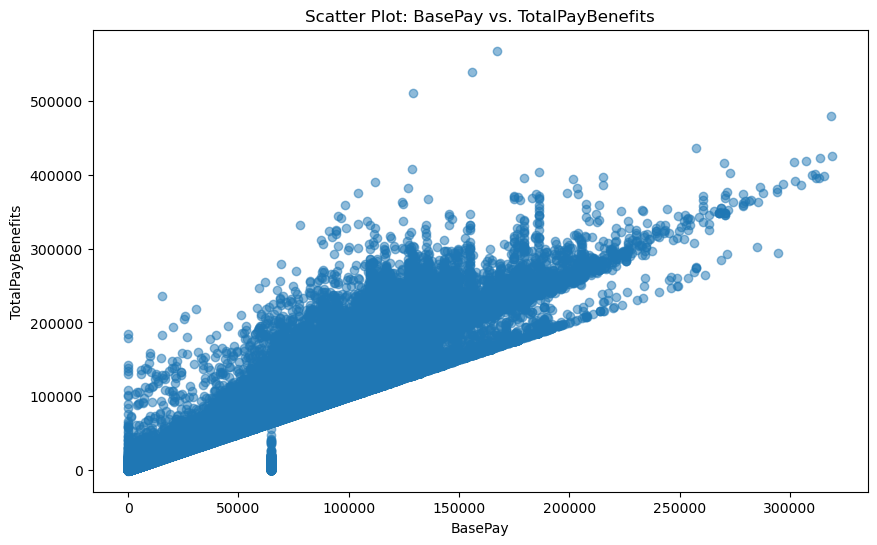

In [50]:
# Simple Correlation Analysis between 'BasePay' and 'TotalPayBenefits'
correlation_basepay_salary = df['BasePay'].corr(df['TotalPayBenefits'])

print("Correlation between BasePay and TotalPayBenefits:", correlation_basepay_salary)

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['BasePay'], df['TotalPayBenefits'], alpha=0.5)
plt.title('Scatter Plot: BasePay vs. TotalPayBenefits')
plt.xlabel('BasePay')
plt.ylabel('TotalPayBenefits')
plt.show()


In [ ]:
#category column

/var/folders/wd/7c9c8mn97319ck459l22ttch0000gn/T/ipykernel_908/1700289947.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='TotalPay', data=df, ci=None)  # ci=None to disable error bars


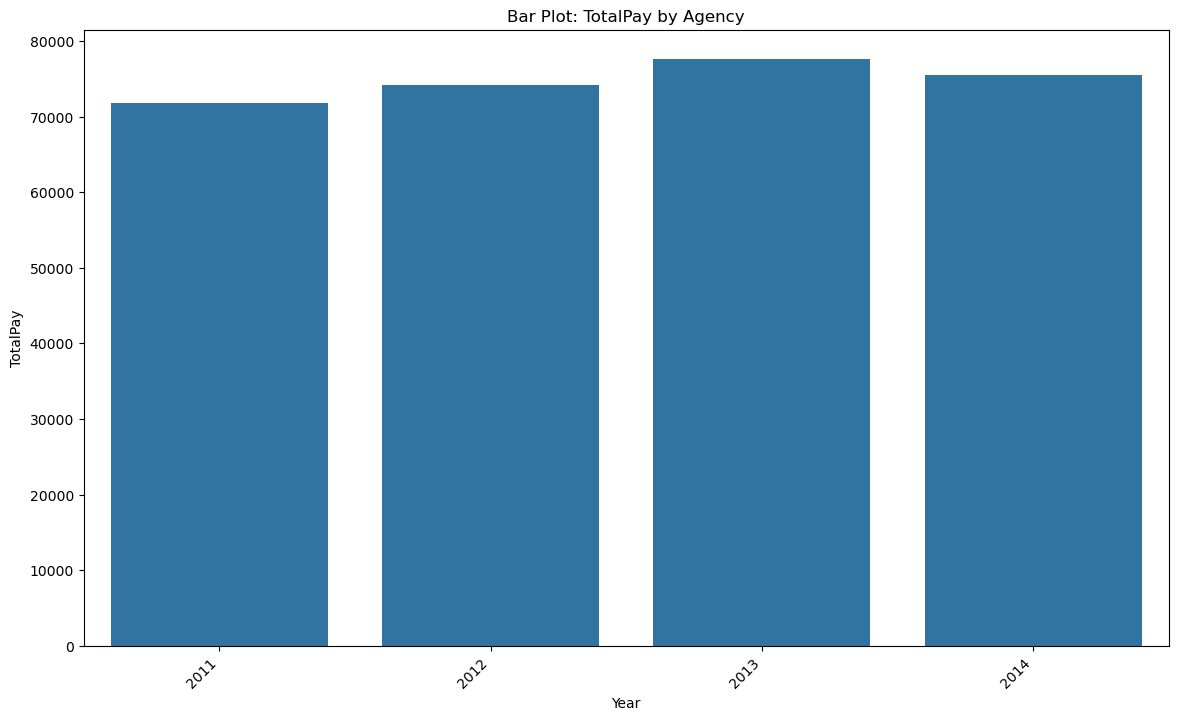

In [59]:
import seaborn as sns

# Bar plot between Agency and TotalPay
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='TotalPay', data=df, ci=None)  # ci=None to disable error bars
plt.title('Bar Plot: TotalPay by Agency')
plt.xlabel('Year')
plt.ylabel('TotalPay')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


/var/folders/wd/7c9c8mn97319ck459l22ttch0000gn/T/ipykernel_908/2602321080.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobTitle', y='TotalPay', data=df, ci=None)  # ci=None to disable error bars


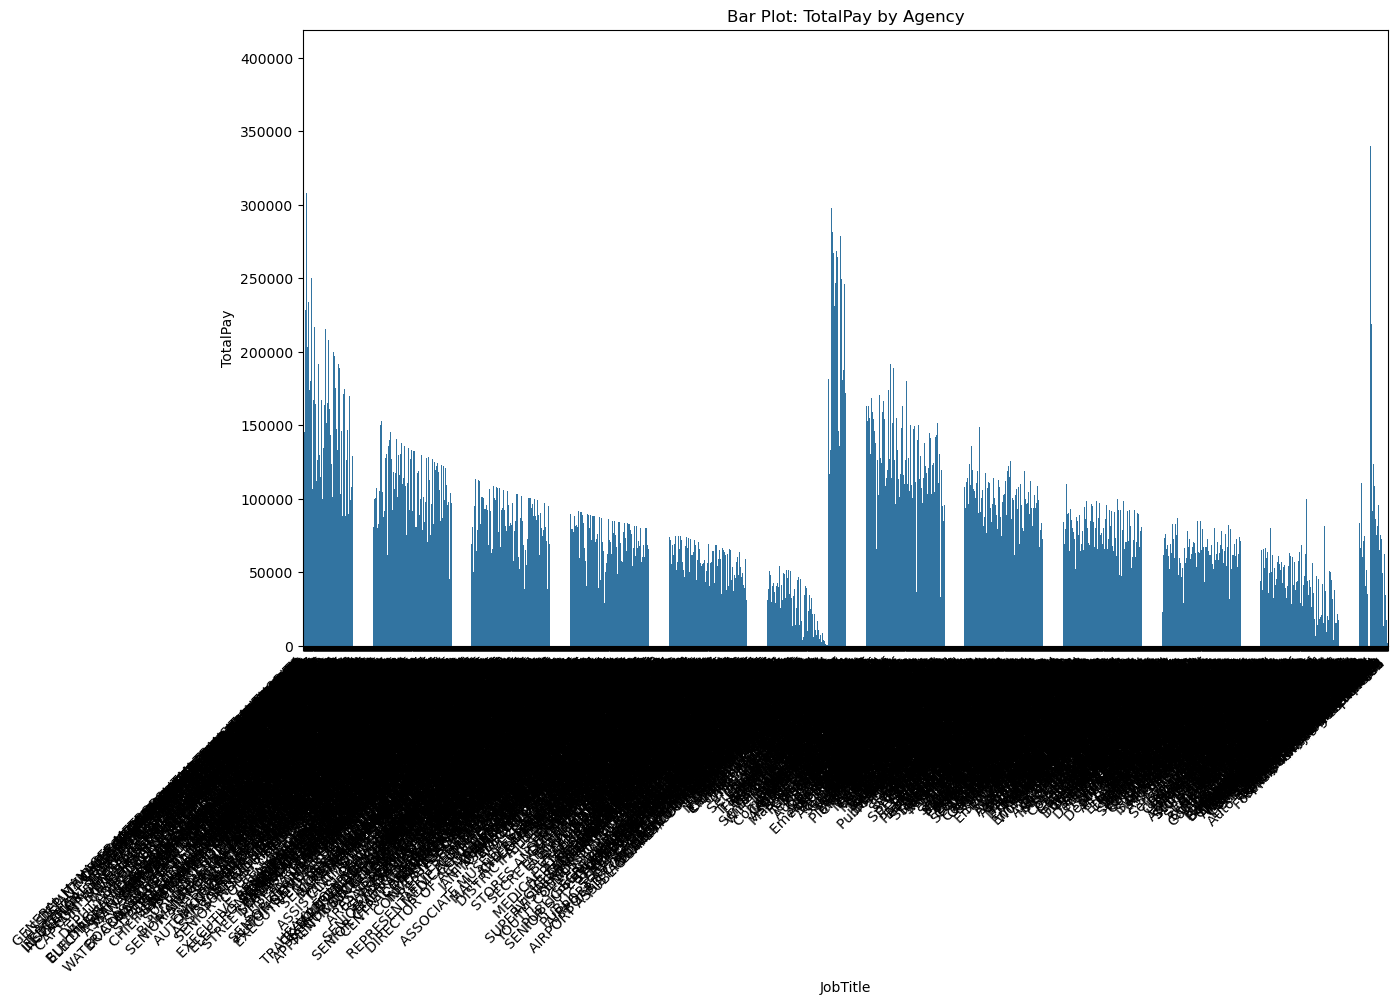

In [60]:


import seaborn as sns

# Bar plot between Agency and TotalPay
plt.figure(figsize=(14, 8))
sns.barplot(x='JobTitle', y='TotalPay', data=df, ci=None)  # ci=None to disable error bars
plt.title('Bar Plot: TotalPay by Agency')
plt.xlabel('JobTitle')
plt.ylabel('TotalPay')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [62]:
# JobTitle for the minimum TotalPay
min_totalpay_job = df.loc[df['TotalPay'].idxmin()]['JobTitle']
min_totalpay_value = df['TotalPay'].min()

# JobTitle for the maximum TotalPay
max_totalpay_job = df.loc[df['TotalPay'].idxmax()]['JobTitle']
max_totalpay_value = df['TotalPay'].max()

print("JobTitle with the Minimum TotalPay:", min_totalpay_job)
print("Minimum TotalPay Value:", min_totalpay_value)

print("\nJobTitle with the Maximum TotalPay:", max_totalpay_job)
print("Maximum TotalPay Value:", max_totalpay_value)


JobTitle with the Minimum TotalPay: Counselor, Log Cabin Ranch
Minimum TotalPay Value: -618.13

JobTitle with the Maximum TotalPay: GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Maximum TotalPay Value: 567595.43


<h1>Summary of Insights</h1>

There is notable variation between salaries, average = 74768.32, maximum = 567595.43 for GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY, minimum = -618.13 for  Counselor.

There is also a discrepancy in the number of employees in each job, and the transit operator was the largest.

The correlation between the salary, the basic salary, and the totalpaybenefits was a strong relationship and 
affected it mainly, followed by benefits, OvertimePay, which affected it moderately, and the relationship was positive.
    
As for the year, it did not have a significant impact on the salary

# Good Luck!